# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

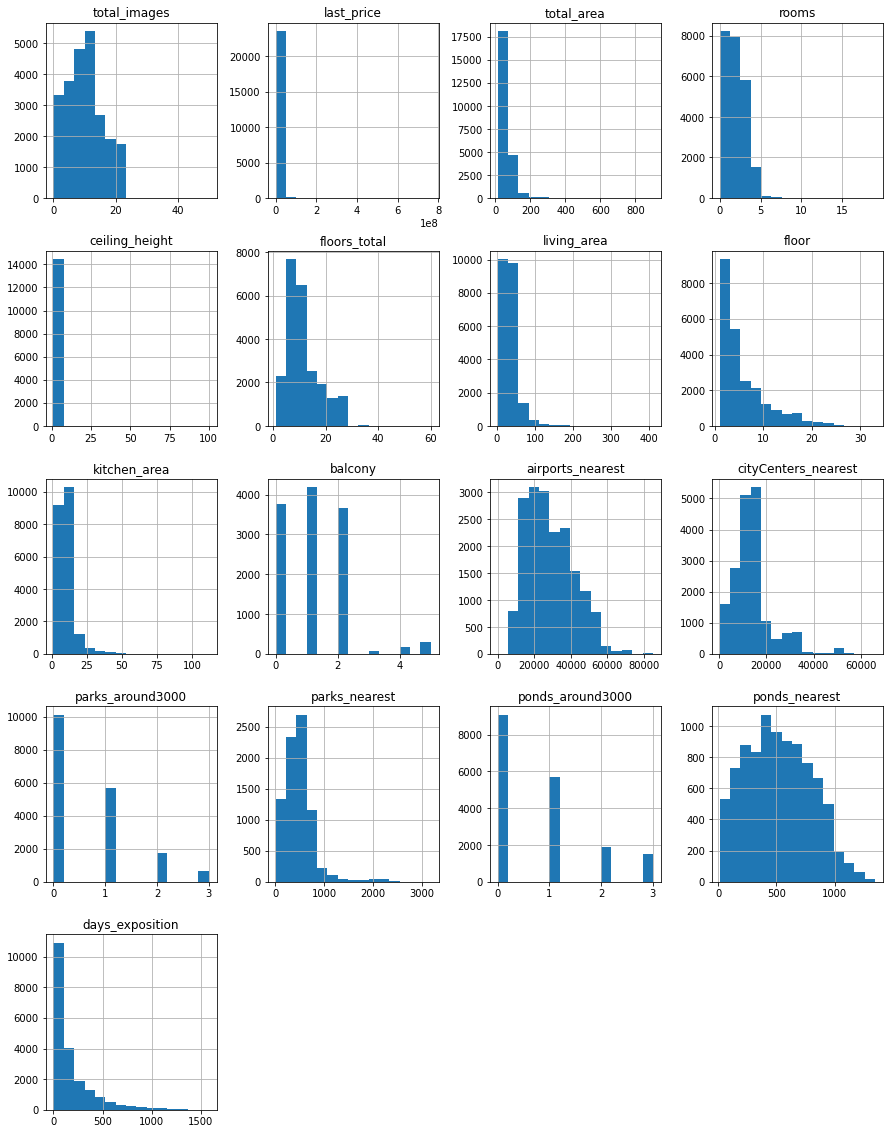

In [2]:
data.info()
data.hist(figsize=(15, 20), bins = 15)

Мы обнаружили проблемы с даннами, пропуски, дубликаты, неверный тип данных а так же странные значения.

### Предобработка данных

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
#Балконы:
data['balcony'] = data['balcony'].fillna(0).astype('int') #Заполняем пропуски нулями, тк скорее всего балконов в этих квартирах нет и меняем тип данных, тк к количесвто балконов - целое число

In [5]:
#Рассмотрим высоту потолков есть нулевые значения, оставим их как есть, так же есть очень большие значения для высоты потолков:
data['ceiling_height'].loc[data['ceiling_height'] > 4].sort_values(ascending = False).head(30)

22869    100.0
22336     32.0
3148      32.0
21377     27.5
22938     27.0
21824     27.0
10773     27.0
17857     27.0
20478     27.0
5807      27.0
5246      27.0
4876      27.0
5669      26.0
11285     25.0
14382     25.0
18545     25.0
6246      25.0
355       25.0
9379      25.0
4643      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
17442      8.0
15743      8.0
20264      6.0
Name: ceiling_height, dtype: float64

In [6]:
#Рассмотрим количество этажей:
data.loc[data['floors_total'].isna()].head(5)#пропуски пока оставим, тк неизвестна причина по которой они есть

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


In [7]:
#жилая площадь:
data.loc[data['living_area'].isna()].head()
#причины пропусков непонятна, оставим как есть

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,...,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


In [8]:
#апартаменты
data['is_apartment'] = data['is_apartment'].fillna('False').astype('bool') #Заполним пропуски на 'False', т. к. этот параметр скорее всего не указали из-за того что он не является апартаментами и изменим тип данных на bool

In [9]:
#заменим пропуски в days_exposition и заменим тип данных
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

In [10]:
#переведем столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [11]:
#Обработаем дубликаты, если они есть
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace('Мурино', 'поселок Мурино')
) 
data.duplicated().sum()

0

### Посчитайте и добавьте в таблицу новые столбцы

In [12]:
#Цена за один кв метр
data['one_square_price'] = round(data['last_price'] / data['total_area'], 2)

In [13]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday #Дни недели
data['month_exposition'] = data['first_day_exposition'].dt.month #Месяц
data['year_exposition'] = data['first_day_exposition'].dt.year #год
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_price,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,16028.0,1.0,482.0,2.0,755.0,<NA>,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,...,18603.0,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,...,13933.0,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,...,6800.0,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,8098.0,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018


In [14]:
#напишем функцию категоризации по этажам и создадим столбец
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_price,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,1.0,482.0,2.0,755.0,<NA>,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,...,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,...,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,...,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018,другой


In [15]:
#расстояние до центра города в километрах
data['city_centers_nearest_km'] = round(data['cityCenters_nearest'] / 1000)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,482.0,2.0,755.0,<NA>,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,...,NaN,0.0,NaN,81,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,...,90.0,2.0,574.0,558,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,...,84.0,3.0,234.0,424,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,112.0,1.0,48.0,121,100000.00,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

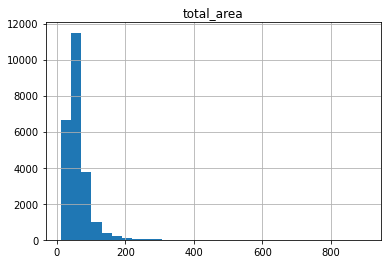

In [16]:
#общая площадь
data.hist('total_area', bins = 30)
#выбросы есть, но сильно они не влияют на данные

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

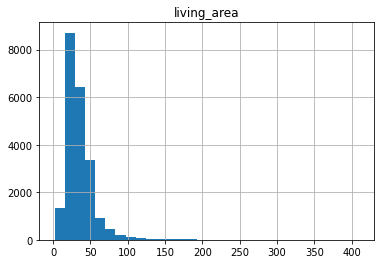

In [17]:
#жилая площадь
data.hist('living_area', bins = 30)
#выбросы есть, но сильно они не влияют на данные

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

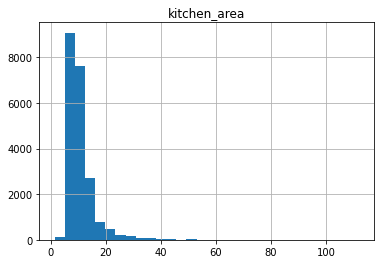

In [18]:
#общая площадь
data.hist('kitchen_area', bins = 30)
#выбросы есть, но сильно они не влияют на данные

In [19]:
data.loc[data['kitchen_area'].isna() == False].sort_values(by = 'kitchen_area').tail(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
7543,20,130000000.0,307.8,2016-04-24,5,NaN,4.0,187.9,3,True,...,NaN,1.0,603.0,1094,422352.18,6,4,2016,другой,5.0
19499,10,8000000.0,118.0,2017-08-31,3,3.0,5.0,36.0,4,False,...,569.0,0.0,NaN,7,67796.61,3,8,2017,другой,31.0
15780,9,12990000.0,119.6,2017-03-13,3,3.0,5.0,36.4,4,False,...,569.0,0.0,NaN,<NA>,108612.04,0,3,2017,другой,31.0
17912,17,135000000.0,166.0,2019-02-07,3,3.3,7.0,52.0,1,True,...,230.0,3.0,215.0,<NA>,813253.01,3,2,2019,первый,6.0
18447,17,21800000.0,187.0,2018-01-14,5,NaN,4.0,120.0,4,True,...,756.0,2.0,278.0,<NA>,116577.54,6,1,2018,последний,15.0
22980,19,24500000.0,155.4,2017-10-10,3,3.0,4.0,72.0,2,True,...,756.0,2.0,278.0,325,157657.66,1,10,2017,другой,15.0
1085,16,75000000.0,323.0,2017-07-10,5,4.0,5.0,255.7,4,True,...,398.0,2.0,515.0,259,232198.14,0,7,2017,другой,1.0
15651,20,300000000.0,618.0,2017-12-18,7,3.4,7.0,258.0,5,True,...,NaN,2.0,198.0,111,485436.89,0,12,2017,другой,5.0
6193,19,24300000.0,230.0,2016-06-03,4,NaN,3.0,90.0,2,False,...,NaN,1.0,345.0,397,105652.17,4,6,2016,другой,15.0
16647,15,122000000.0,145.0,2017-04-25,3,3.3,6.0,36.0,2,True,...,478.0,3.0,250.0,335,841379.31,1,4,2017,другой,7.0


In [20]:
(data[['total_area', 'kitchen_area']].loc[(data['kitchen_area'].isna() == False) & (data['kitchen_area'] > data['total_area'])].
 sort_values(by = 'kitchen_area').
 count()) #проверяем, есть ли такие значения, где общая площадь меньше чем площадь кухни
#похоже что с кухнями тоже все в норме

total_area      0
kitchen_area    0
dtype: int64

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

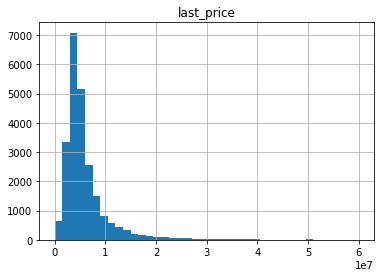

In [21]:
# цена
data.hist('last_price', bins = 40, range = (0, 60000000))

In [22]:
data['last_price'].describe()
#тут вроде тоже все нормально

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

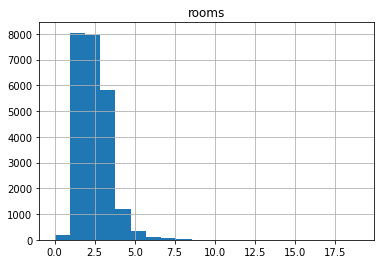

In [23]:
#комнаты
data.hist('rooms', bins = 20)

In [24]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [25]:
print(data['rooms'].loc[data['rooms'] == 0].count()) # избавимся от данных с нулевым количеством комнат, их не так много, поэтому они не сильно повлияют на анализ
data = data.loc[data['rooms'] != 0]

197


In [26]:
data['rooms'].describe()

count    23502.000000
mean         2.087993
std          1.066050
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [27]:
data['ceiling_height'].describe()

count    14422.000000
mean         2.769607
std          1.248101
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

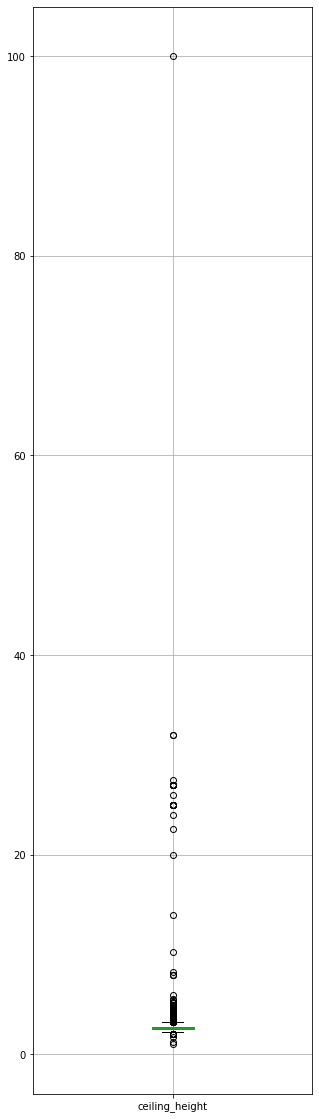

In [28]:
data.boxplot('ceiling_height', figsize = (5, 20))

прослеживаются подозрительно высокие потолки, избавимся от выбросов и заменим все значения от 25 до 40 на значения деленные на 10

In [29]:
data.loc[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 40), 'ceiling_height'] /= 10
data['ceiling_height'].loc[(data['ceiling_height'] <= 2) | (data['ceiling_height'] >= 4)].count() / len(data['ceiling_height'])

0.004595353586928772

выбросы составляют менее процента, поэтому избавимся от них

In [30]:
data['ceiling_height'].describe()

count    14422.000000
mean         2.739559
std          0.913085
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [31]:
#data = data.loc[(data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 4)]
#data.boxplot('ceiling_height', figsize = (5, 20))

<AxesSubplot:>

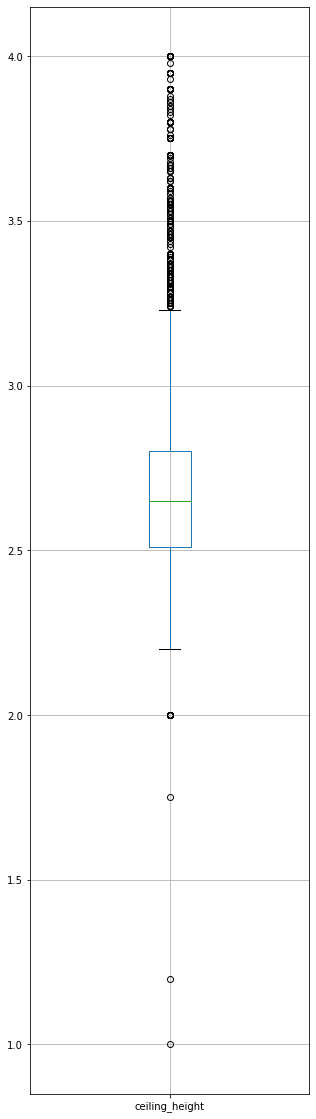

In [32]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: data['ceiling_height'].loc[data['ceiling_height'] < 4].median() if x > 4 else x)
data.boxplot('ceiling_height', figsize = (5, 20))

рассмотрим общее количество этажей

<AxesSubplot:>

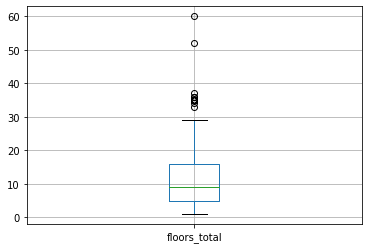

In [33]:
data.boxplot('floors_total')
#вполне реальные цифры

теперь посмотрим расстояние до центра города в метрах

<AxesSubplot:>

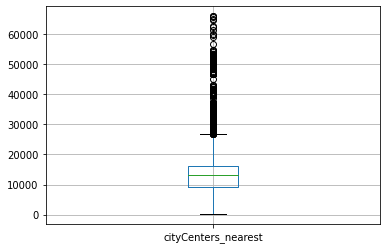

In [34]:
data.boxplot('cityCenters_nearest')

In [35]:
data['cityCenters_nearest'].describe()

count    18062.000000
mean     14196.521703
std       8626.727604
min        181.000000
25%       9234.000000
50%      13093.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

не будем трогать эти данные, т к неизвестна причина по которой есть такие выбросы, возможно это реальное расстояние до центра

И напоследок посмотрим расстояние до ближайшего парка

<AxesSubplot:>

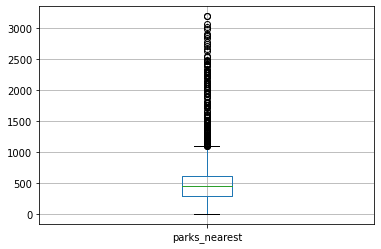

In [36]:
data.boxplot('parks_nearest')

In [37]:
data['parks_nearest'].describe()

count    8050.000000
mean      490.429689
std       342.411533
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

График для категории этажей:

<AxesSubplot:>

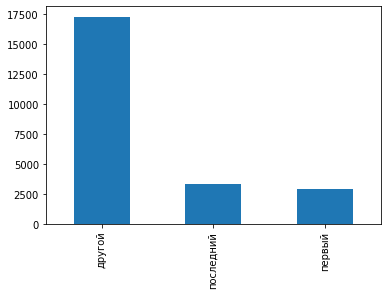

In [38]:
data['floor_category'].value_counts().plot(kind='bar')

Все значения выглядят правдоподобными

#### Рассмотрим как долго продавались квартиры:

In [39]:
data['days_exposition'].describe()

count    20335.000000
mean       181.533956
std        220.096252
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

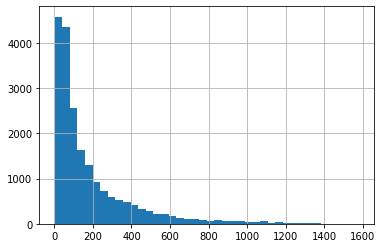

In [40]:
data['days_exposition'].hist(bins = 40)

<AxesSubplot:>

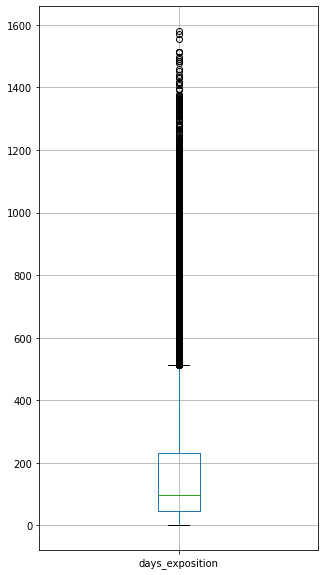

In [41]:
data.boxplot('days_exposition', figsize = (5, 10))

In [42]:
print('Среднее значение:', data['days_exposition'].mean())
print(f'Медианное значение:', data['days_exposition'].median())

Среднее значение: 181.53395623309564
Медианное значение: 96.0


Мы видим, что среднее значение больше медианного чуть больше чем в два раза, на это повлияли выбросы и большие значения, которые просматриваются на графике с усами.
В среднем квартиры продаются 2-3 месяца, но есть и такие, которые продаются в самый первые 10 дней, либо наоборот, продаются слишком долго, более 1.5 года.

In [43]:
data['days_exposition'].loc[data['days_exposition'] < 10].value_counts()#объявление висевшие менее 10 дней

7    228
4    173
3    154
5    148
9    142
8    138
6    123
2      3
1      1
Name: days_exposition, dtype: Int64

Подозрительно много продаж в первst день выставления объявления, попробуем понять почему так, рассмотрев среднюю цену за квадратный метр в первые 10 дней и во все остальные.

In [44]:
print('Медианное значение цены за квадратный метр в первые 10 дней:', data['one_square_price'].loc[data['days_exposition'] < 11].median())

Медианное значение цены за квадратный метр в первые 10 дней: 96414.8


In [45]:
print('Медианное значение цены за квадратный метр не в остальные дни:', data['one_square_price'].loc[data['days_exposition'] > 10].median())

Медианное значение цены за квадратный метр не в остальные дни: 93750.0


Похоже, что быстрые продажи никак не связаны с ценой, оставим это и рассмортим далее долгие продажи по тому же принципу

In [46]:
data['days_exposition'].loc[data['days_exposition'] > 500].value_counts() #Продажи висевшие более 500 дней

549     13
507     11
594     11
719     11
626     10
        ..
1257     1
1313     1
1406     1
1396     1
1580     1
Name: days_exposition, Length: 641, dtype: Int64

In [47]:
print('Медианное значение цены за кв м объявлений висевших более 10 дней и менее 500:', data['one_square_price'].loc[(data['days_exposition'] < 500) & (data['days_exposition'] > 10)].median())
print('Медианное значение цены за кв объявлений висевших более более 500 дней:', data['one_square_price'].loc[(data['days_exposition']) > 500].median())


Медианное значение цены за кв м объявлений висевших более 10 дней и менее 500: 93589.74
Медианное значение цены за кв объявлений висевших более более 500 дней: 95192.31


Та же ситуация что и с быстрыми продажами, непонятно вообще из-за чего квартиры продаются так долго

#### Рассмотрим какие значения вляют на общую стоимость объекта

0.6531162323425472 - корреляция


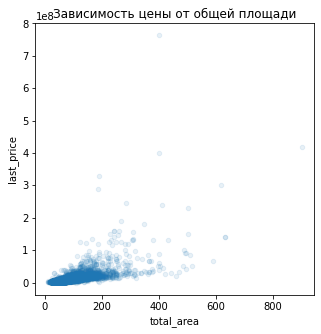

In [48]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, figsize = (5,5), title = 'Зависимость цены от общей площади')
print(data['total_area'].corr(data['last_price']), '- корреляция') #кореляция

По графику и по корреляция можно понять, что цена за объект зависит от общей площади, чем больше площадь, тем больше стоимость квартиры

0.5660247789274262 - корреляция


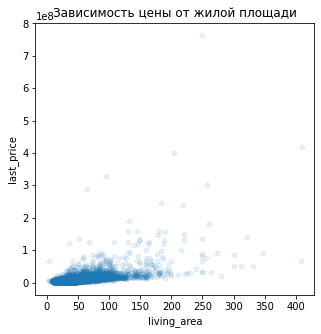

In [49]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1, figsize = (5,5), title = 'Зависимость цены от жилой площади')
print(data['living_area'].corr(data['last_price']), '- корреляция') #кореляция

По графику и по корреляция можно понять, что цена за объект на прямую зависит от жилой площади, чем больше площадь, тем больше стоимость квартиры

0.5198690130216392 - корреляция


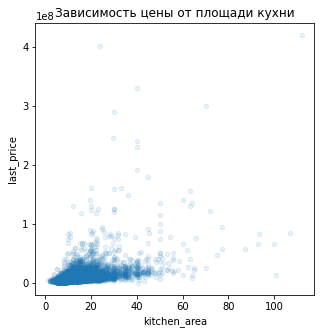

In [50]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1, figsize = (5,5), title = 'Зависимость цены от площади кухни')
print(data['kitchen_area'].corr(data['last_price']), '- корреляция') #кореляция

по корреляции можно понять, что есть связь между ценой и площадью кухни есть но не слишком сильная, чем больше площадь кухни, тем больше цена, но так бывает не всегда.

,mean,count,median
floor_category,,,
первый,81899.058689,2899,81218.27
последний,93380.911335,3325,87771.20


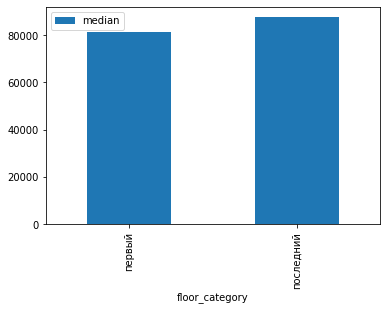

In [51]:
pivot_table_floor_category = data.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'one_square_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot.bar(y = 'median')
pivot_table_floor_category

Трудно сделать какие либо выводы по этим графикам, цена на первый этаж немного ниже чем на последний

Изучим зависимость цены от дня недели:

,mean,count,median
weekday_exposition,,,
1,99693.295400,4148,95533.860
2,99543.492115,3944,95454.550
3,100029.766093,4257,95000.000
0,99415.216948,3591,94666.670
4,98889.712332,3950,94444.440
6,97648.673092,1688,94444.440
5,98969.515192,1924,93473.365


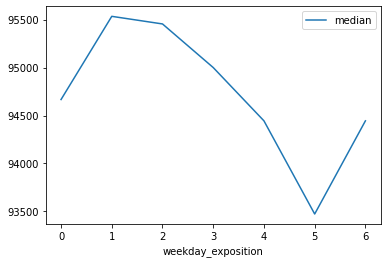

In [52]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'one_square_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

Значения различаются, но незначительно, мы видим, что именно в рабочие дни цена выше.

Рассмотрим зависимость цены от месяца:

,mean,count,median
month_exposition,,,
4,101886.824537,2365,96385.540
8,100002.000366,1723,95774.650
9,100475.387655,1957,95592.140
11,99049.212679,2340,95459.970
3,98954.926280,2570,95228.100
1,99882.965746,1488,95200.945
2,98680.180092,2622,95000.000
7,99348.749690,1678,94888.455
10,97869.525902,2111,94142.860


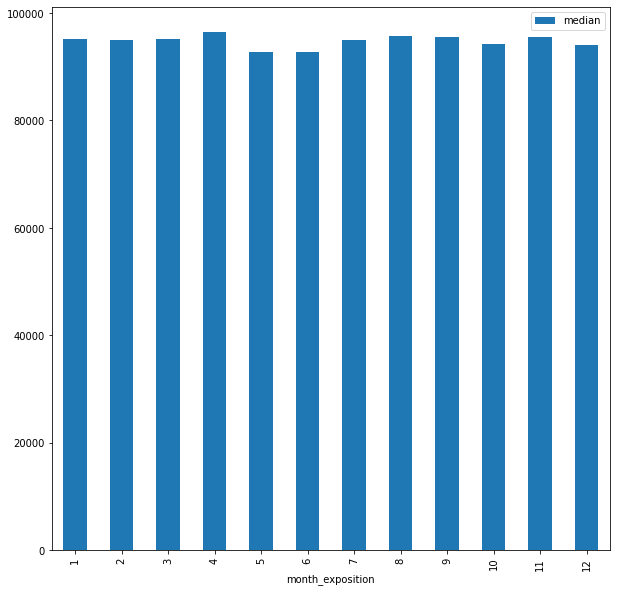

In [53]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'one_square_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot.bar(y = 'median', figsize = (10,10))

pivot_table_month_exposition.sort_values('median', ascending = False)

Мы видим что цена ниже всего в объявлениях, выставленных в мае и июне, а самая высокая стоимость в апреле и августе

Рассмотрим зависимость цены от года

,mean,count,median
year_exposition,,,
2014,124830.426569,137,107000.000
2019,107091.141506,2862,103195.725
2018,97656.520873,8445,95563.140
2015,104646.466052,1188,93426.065
2017,97512.451254,8091,92378.750
2016,98315.067539,2779,91666.670


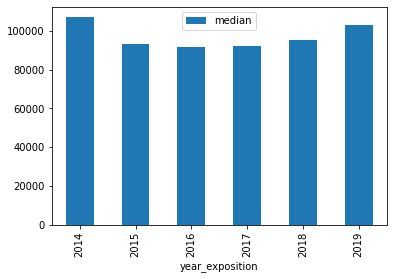

In [54]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'one_square_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot.bar(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

Мы видим, что в 2014 году, цена была самой высокой, но затем, до 2016 года она падала, и только с 2017 года снова начала расти

Теперь рассмотрим зависимость цены от кол-ва комнат в квартире:

0.36473613698747404 - корреляция


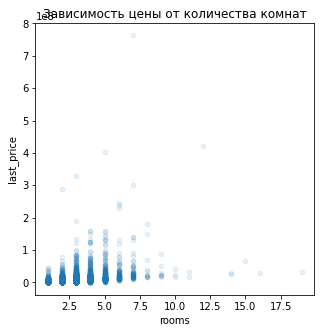

In [55]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1, figsize = (5,5), title = 'Зависимость цены от количества комнат')
print(data['rooms'].corr(data['last_price']), '- корреляция') #кореляция

похоже что цена на квартиры не так сильно зависит от кол-ва комнат, как другие факторы

#### Теперь посмотрим на населенные пункты с самыми низкими и высокими ценами на квартиры

In [56]:
locality_price = data.pivot_table(index = 'locality_name', values = 'one_square_price', aggfunc = ['mean', 'count'])
locality_price.head(5)

,mean,count
,one_square_price,one_square_price
locality_name,,
Бокситогорск,17551.591250,16
Волосово,40183.326111,36
Волхов,35087.680000,111
Всеволожск,68618.013724,392
Выборг,58141.909325,237


In [57]:
locality_price.columns = ['mean_price', 'locality_count']
locality_price = locality_price.sort_values(by = 'locality_count', ascending = False).head(10)
locality_price.sort_values(by = 'mean_price')

,mean_price,locality_count
locality_name,,
Выборг,58141.909325,237
Всеволожск,68618.013724,392
Гатчина,68746.146515,307
Колпино,75424.579112,338
поселок Шушары,78405.738532,436
поселок Мурино,85443.035730,562
поселок Парголово,90289.778019,323
деревня Кудрово,92297.218834,283
Пушкин,103125.819377,369


пункт с самой дешевой ценой за квадратный метр - Всеволжск и Выборг, а с самой дорогой ценой за кв метр - Санкт-Петербург, похоже на правду

#### Зависимость цены на квартиры в Санкт - Петербурге от удаленности от центра:

<AxesSubplot:title={'center':'Зависимость цены от расстояния до центра города'}, xlabel='city_centers_nearest_km'>

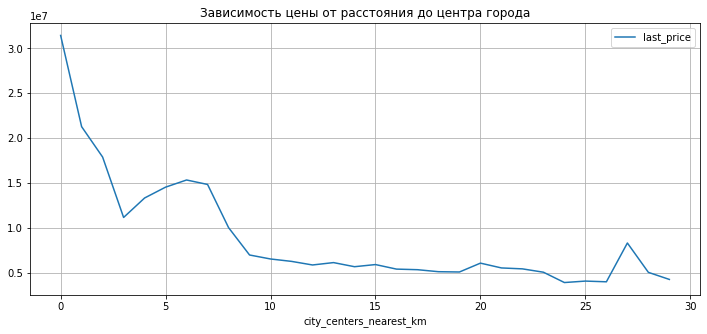

In [58]:
(data.loc[data['locality_name'] == 'Санкт-Петербург'].
pivot_table(index = 'city_centers_nearest_km', values = 'last_price').
plot(grid=True, figsize=(12, 5), title = 'Зависимость цены от расстояния до центра города'))

мы видим, что чем ближе расстояние к центру, тем дороже цена на квартиру, но есть и выделяющиеся значения в промежутке от 25 до 30 км, возможно это как-то связано с другими параметрами квартир

### Общий вывод

**Вывод:** В ходе исследовательской работы были устранены неполадки с данными, удалены все дубликаты, заполнены пустые значения, где это возможно, убраны аномалии. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. Мы выявили, что нормальные значения продажи квартир варьируются от 1 до 500 дней. Была проведена работа по установке связи определенных параметров и стоимости квартиры, каждый параметр описан и построены графики и так же коэфициент корреляции, мы выяснили, что больше всего на стоимость квартиры влиет размер общей и жилой площади, стоит так же учитывать площадь кухни и расстояние до центра города. Таким образом, проделанная работа позволит отследить аномалии и мошеническую деятельность.
